# Informasi Datasets
This dataset that will be using is Global Air Pollution which  the data were collected from all countries worlwide.

In this dataset, all type of causes of air pollution and was applied into various of various type of category to determine the health of air in each country.

Data Set characteristics :

1) Country : Name of the country

2) City : Name of the city

3) AQI Value : Overall AQI value of the city

4) AQI Category : Overall AQI category of the city

5) CO AQI Value : AQI value of Carbon Monoxide of the city

6) CO AQI Category : AQI category of Carbon Monoxide of the city

7) Ozone AQI Value : AQI value of Ozone of the city

8) Ozone AQI Category : AQI category of Ozone of the city

9) NO2 AQI Value : AQI value of Nitrogen Dioxide of the city

10)NO2 AQI Category : AQI category of Nitrogen Dioxide of the city

11) PM2.5 AQI Value : AQI value of Particulate Matter with a diameter of 2.5 micrometers or less of the city

12) PM2.5 AQI Category : AQI category of Particulate Matter with a diameter of 2.5 micrometers or less of the city

For this study, PM2.5 AQI Category will be our references as the health of air that has been collected in each country/

In [10]:
# https://drive.google.com/file/d/16FObxWWuNUd4oLVTy9bXyZ13cPNcG5Wq/view?usp=sharing
!gdown 16FObxWWuNUd4oLVTy9bXyZ13cPNcG5Wq

Downloading...
From: https://drive.google.com/uc?id=16FObxWWuNUd4oLVTy9bXyZ13cPNcG5Wq
To: /content/global air pollution dataset.csv
100% 1.63M/1.63M [00:00<00:00, 58.5MB/s]


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import learning_curve


pd.set_option('max_colwidth', 200)

%matplotlib inline

In [12]:
df= 'global air pollution dataset.csv'
air = pd.read_csv(df)

In [13]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [14]:
air.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [15]:
air.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [16]:
air.isnull().sum()

,0
Country,427
City,1
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


In [17]:
air.dropna(inplace=True)

In [18]:
air.isnull().sum()

,0
Country,0
City,0
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


In [19]:
air.duplicated().sum()

np.int64(0)

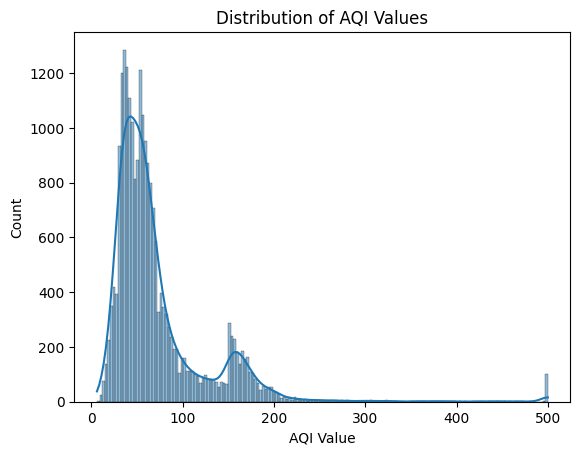

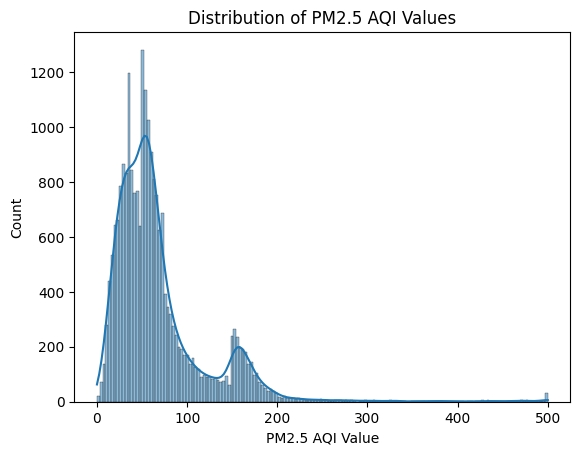

In [20]:
sns.histplot(air['AQI Value'], kde=True)
plt.title('Distribution of AQI Values')
plt.show()

# Distribution of PM2.5 AQI Values
sns.histplot(air['PM2.5 AQI Value'], kde=True)
plt.title('Distribution of PM2.5 AQI Values')
plt.show()

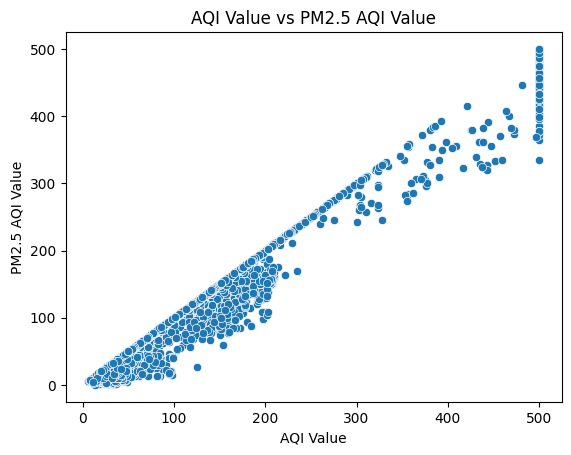

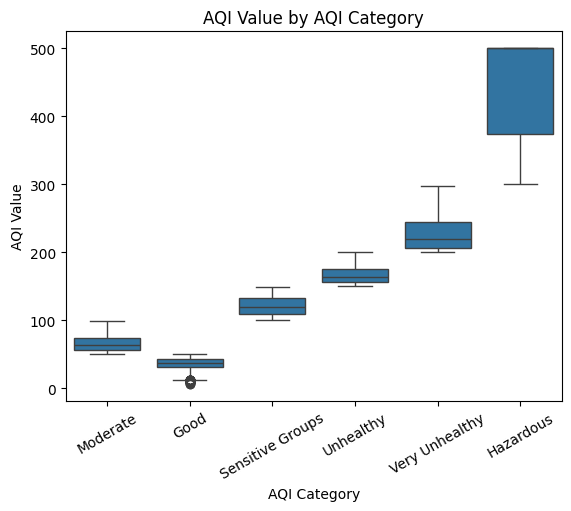

In [22]:
# Scatter plot between AQI Value and PM2.5 AQI Value
sns.scatterplot(x='AQI Value', y='PM2.5 AQI Value', data=air)
plt.title('AQI Value vs PM2.5 AQI Value')
plt.show()

# Box plot of AQI Value by AQI Category
sns.boxplot(x='AQI Category', y='AQI Value', data=air)
plt.title('AQI Value by AQI Category')
plt.xticks(rotation=30,ticks=range(6), labels=['Moderate','Good', 'Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'])
plt.show()

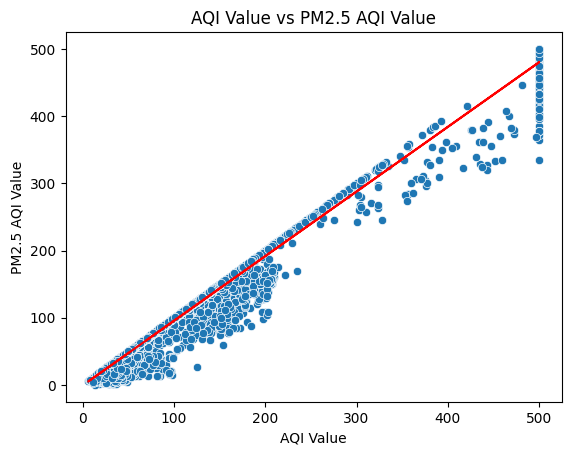

In [24]:
from sklearn.linear_model import LinearRegression

#create instance of linear regression model
model = LinearRegression()

#convert 1D array into 2D array
x = air['AQI Value'].values.reshape(-1, 1)
y = air['PM2.5 AQI Value'].values.reshape(-1, 1)

#fit the model to variables given
model.fit(x, y)

#plot regression line and graph
plt.plot(x, model.predict(x), color='red')
sns.scatterplot(x='AQI Value', y='PM2.5 AQI Value', data=air)
plt.title('AQI Value vs PM2.5 AQI Value')
plt.show()

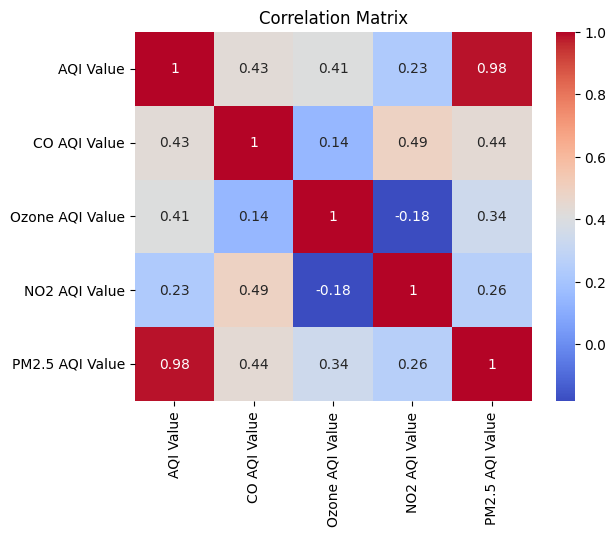

In [25]:
corr_matrix = air[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

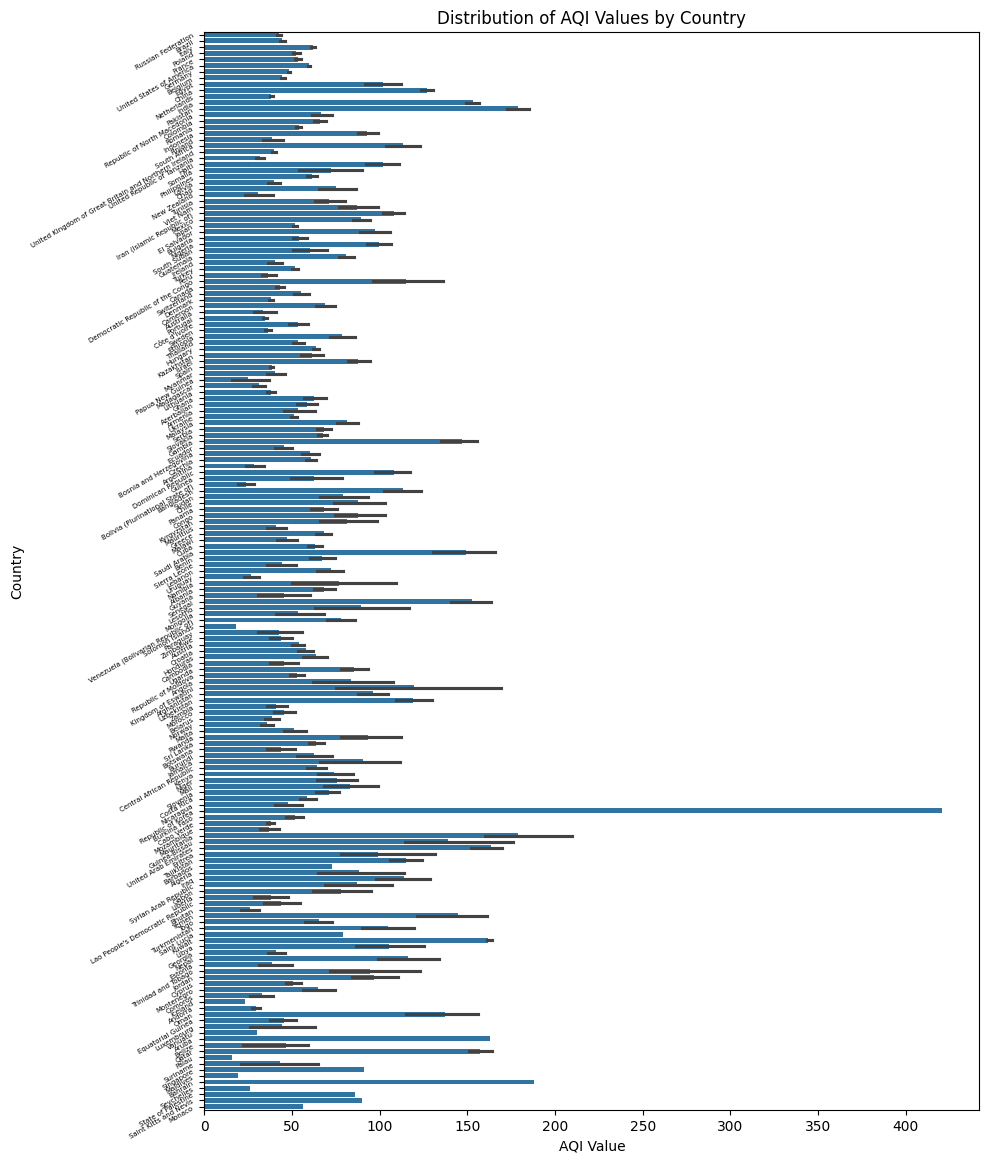

In [26]:
plt.figure(figsize=(10, 14))

sns.barplot(x='AQI Value', y='Country', data=air)
plt.title('Distribution of AQI Values by Country')
plt.xlabel('AQI Value')
plt.ylabel('Country')
plt.yticks(rotation=30,fontsize=5)
plt.show()

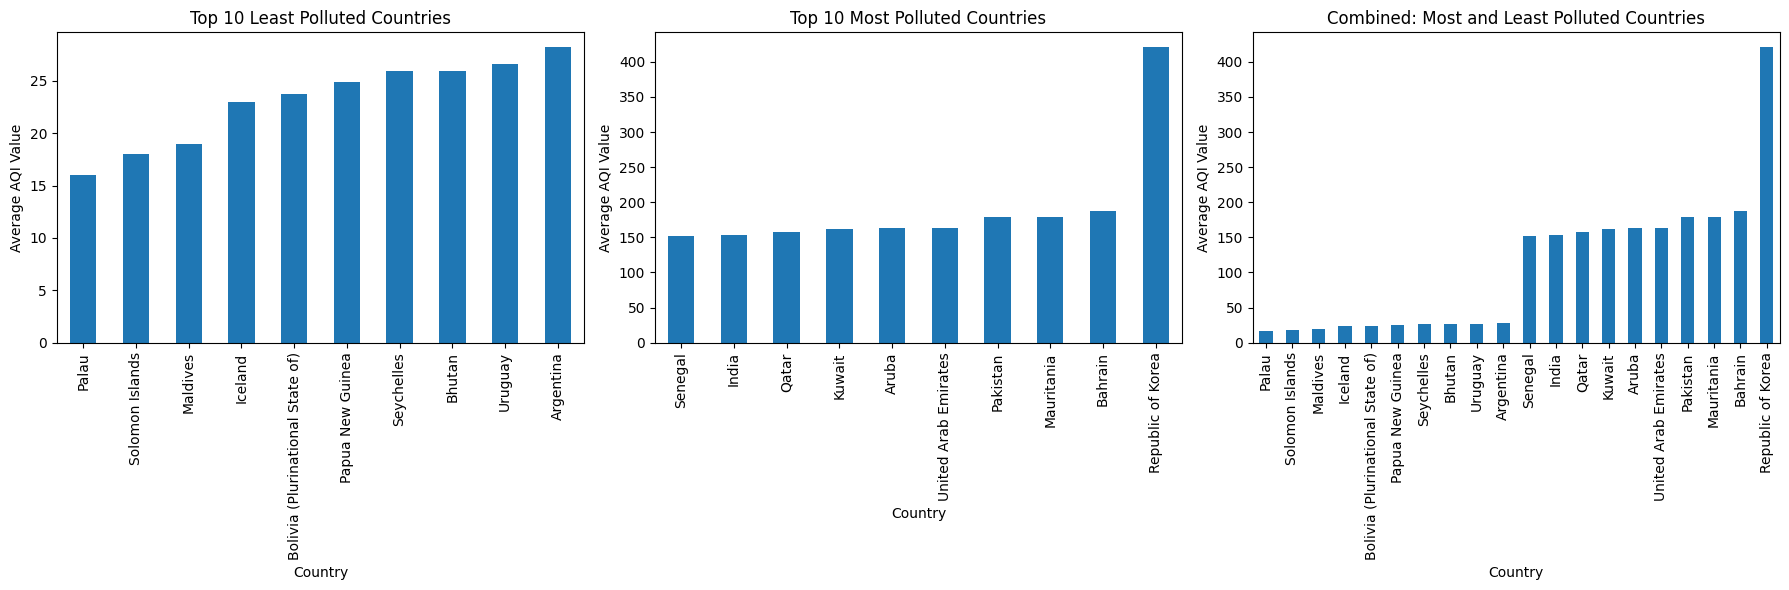

In [27]:
avg_aqi_by_country = air.groupby('Country')['AQI Value'].mean().sort_values()
top_10_least_polluted = avg_aqi_by_country.head(10)
top_10_polluted = avg_aqi_by_country.tail(10)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Top 10 Least Polluted Countries
top_10_least_polluted.plot(kind='bar', ax=axes[0])
axes[0].set_title('Top 10 Least Polluted Countries')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Average AQI Value')

# Plot 2: Top 10 Most Polluted Countries
top_10_polluted.plot(kind='bar', ax=axes[1])
axes[1].set_title('Top 10 Most Polluted Countries')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Average AQI Value')

# Plot 3: Combined
top_10_combined = pd.concat([top_10_least_polluted, top_10_polluted])
top_10_combined.plot(kind='bar', ax=axes[2])
axes[2].set_title('Combined: Most and Least Polluted Countries')
axes[2].set_xlabel('Country')
axes[2].set_ylabel('Average AQI Value')

plt.tight_layout()
plt.show()

In [28]:
# categorical values into numerical format
from sklearn.preprocessing import LabelEncoder
def label(i) :
    air[i] = LabelEncoder().fit_transform(air[i])
    return air[i]

for i in air.iloc[:,:4].columns:
    label(i)

In [29]:
# 'object' to 'int'
for column in air.select_dtypes(include=['object']).columns:
    air[column] = LabelEncoder().fit_transform(air[column])

In [30]:
x = air[['Country','City','AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value','AQI Category']]

# Select target variable (output variable)
y = air['PM2.5 AQI Value']

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [32]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(x_train, y_train)
y_pred = regression.predict(x_test)


In [33]:
regression.coef_

array([ 4.68335514e-03, -3.25658943e-05,  1.15298781e+00,  2.57943360e-02,
       -2.16193089e-01, -2.06593418e-01, -1.89867946e+00])

In [34]:
pd.DataFrame(regression.coef_, x.columns, columns=['Coedicients'])

,Coedicients
Country,0.004683
City,-0.000033
AQI Value,1.152988
CO AQI Value,0.025794
Ozone AQI Value,-0.216193
NO2 AQI Value,-0.206593
AQI Category,-1.898679


In [35]:
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}

In [36]:
regression_cv= GridSearchCV(regression,param_grid,cv=3)

In [37]:
regression_cv.fit(x_train,y_train)


GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]})

In [38]:
print("Tuned hyperparameters : {}".format(regression_cv.best_params_))
print("Best Accuracy: ","{:.0%}".format(regression_cv.best_score_))

Tuned hyperparameters : {'fit_intercept': True, 'positive': False}
Best Accuracy:  97%


In [39]:
pollutants = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

summary_data = {
    'Statistic': ['Highest', 'Lowest', 'Average'],
     'AQI Value': [round(air['AQI Value'].max(), 2), round(air['AQI Value'].min(), 2), round(air['AQI Value'].mean(), 2)],
    'CO AQI Value': [round(air['CO AQI Value'].max(), 2), round(air['CO AQI Value'].min(), 2), round(air['CO AQI Value'].mean(), 2)],
    'Ozone AQI Value': [round(air['Ozone AQI Value'].max(), 2), round(air['Ozone AQI Value'].min(), 2), round(air['Ozone AQI Value'].mean(), 2)],
    'NO2 AQI Value': [round(air['NO2 AQI Value'].max(), 2), round(air['NO2 AQI Value'].min(), 2), round(air['NO2 AQI Value'].mean(), 2)],
    'PM2.5 AQI Value': [round(air['PM2.5 AQI Value'].max(), 2), round(air['PM2.5 AQI Value'].min(), 2), round(air['PM2.5 AQI Value'].mean(), 2)],
    'Most Polluted Country': air.groupby('Country')[pollutants].mean().mean(axis=1).idxmax(),
    'Least Polluted Country': air.groupby('Country')[pollutants].mean().mean(axis=1).idxmin(),
}

summary_df = pd.DataFrame(summary_data)
summary_df

,Statistic,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,Most Polluted Country,Least Polluted Country
0,Highest,346.00,133.00,235.00,91.00,500.00,126,117
1,Lowest,0.00,0.00,0.00,0.00,0.00,126,117
2,Average,65.45,1.38,35.23,3.08,68.88,126,117


In [40]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error

MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)
MAPE= metrics.mean_absolute_percentage_error(y_test, y_pred)


In [41]:
print("Mean Absolute Error","%.4f"%  (MAE))
print("Mean Squared Error","%.4f"%  (MSE))
print("Root Mean Squared Error","%.4f"%  (RMSE))
print("Mean Absolute Percentage Error","%.4f"%  (MAPE))

Mean Absolute Error 5.7897
Mean Squared Error 102.0117
Root Mean Squared Error 10.1001
Mean Absolute Percentage Error 0.1613


In [42]:
test_residual = y_test - y_pred

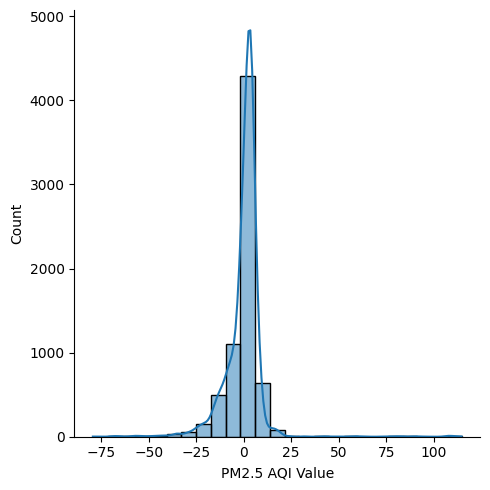

In [43]:
sns.displot(test_residual, bins=25, kde=True)

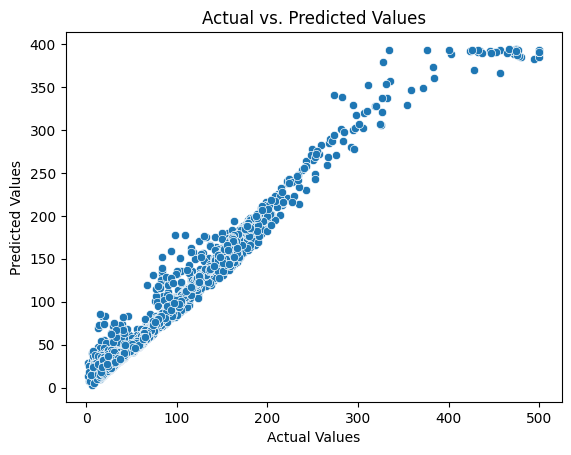

In [44]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


# Polynomial Regression

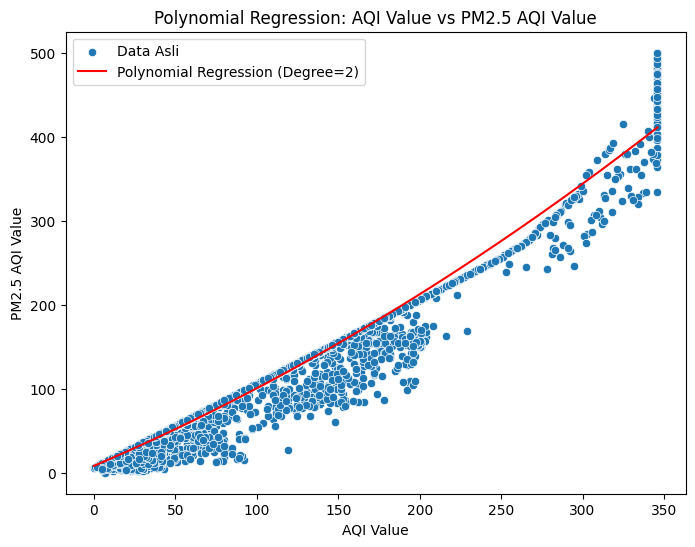

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

# convert 1D array into 2D array
x = air['AQI Value'].values.reshape(-1, 1)
y = air['PM2.5 AQI Value'].values.reshape(-1, 1)

# buat polynomial features (misalnya degree = 2)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

# buat dan latih model
model = LinearRegression()
model.fit(x_poly, y)

# prediksi nilai y dari x yang sudah dipolinomialisasi
y_pred = model.predict(x_poly)

# visualisasi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=air['AQI Value'], y=air['PM2.5 AQI Value'], label='Data Asli')

# urutkan x dan y_pred untuk plot yang halus
sorted_index = x.flatten().argsort()
plt.plot(x.flatten()[sorted_index], y_pred.flatten()[sorted_index], color='red', label='Polynomial Regression (Degree=2)')

plt.title('Polynomial Regression: AQI Value vs PM2.5 AQI Value')
plt.xlabel('AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.legend()
plt.show()


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Hitung error metrics
MAE = mean_absolute_error(y, y_pred)
MSE = mean_squared_error(y, y_pred)
RMSE = np.sqrt(MSE)
MAPE = np.mean(np.abs((y - y_pred) / y)) * 100

# Tampilkan hasil
print("Mean Absolute Error       :", "%.4f" % MAE)
print("Mean Squared Error        :", "%.4f" % MSE)
print("Root Mean Squared Error   :", "%.4f" % RMSE)
print("Mean Absolute Percentage Error :", "%.4f" % MAPE)


Mean Absolute Error       : 6.0153
Mean Squared Error        : 109.8751
Root Mean Squared Error   : 10.4821
Mean Absolute Percentage Error : inf


<ipython-input-64-019d23a54ef7>:8: RuntimeWarning: divide by zero encountered in divide
  MAPE = np.mean(np.abs((y - y_pred) / y)) * 100


# Perbandingan

Linear Regression:
Mean Absolute Error 5.7897  
Mean Squared Error 102.0117  
Root Mean Squared Error 10.1001  
Mean Absolute Percentage Error 0.1613  

Polynomial Regression:
Mean Absolute Error       : 6.0153  
Mean Squared Error        : 109.8751  
Root Mean Squared Error   : 10.4821  
Mean Absolute Percentage Error : inf  
<ipython-input-64-019d23a54ef7>:8: RuntimeWarning: divide by zero
  encountered in divide
  MAPE = np.mean(np.abs((y - y_pred) / y)) * 100   

# Kesimpulan
Semua error (MAE, MSE, RMSE) lebih rendah pada **linear regression**, artinya linear regression memberikan hasil yang lebih baik.